In [1]:
from ml_config import *

In [3]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)


In [5]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.7679
Time:                        15:05:46   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006
==============================================================================
"""

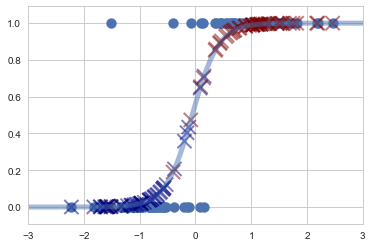

In [6]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
target = iris.target
target = target[target!=2]
len(target)

100

In [16]:
data = iris.data[0:100,0]

In [17]:
data

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7])

In [18]:
df = pd.DataFrame(columns=['length','kind'])

In [19]:
df['length'] = data
df['kind'] = target

In [20]:
df.head()

,length,kind
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0


In [21]:
df.shape

(100, 2)

In [22]:
model = sm.Logit.from_formula("kind ~ length",data=df)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   kind   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.5368
Time:                        16:27:25   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.8315      5.434     -5.122      0.000     -38.481     -17.182
length         5.1403      1.007      5.107      0.000       3.168       7.113
==============================================================================
"""

In [23]:
df['z'] = result.predict(df)

In [24]:
from sklearn.metrics import *

In [25]:
df['y_hat'] = df['z'].apply(lambda x: 1 if x>=0.5 else 0)

In [26]:
df.head()

,length,kind,z,y_hat
0,5.1,0,0.165794,0
1,4.9,0,0.066372,0
2,4.7,0,0.024798,0
3,4.6,0,0.014981,0
4,5.0,0,0.106237,0


In [27]:
target_names = ['setosa','versicolor']
cls_matrix = classification_report(df['kind'], df['y_hat'], target_names=target_names)

In [28]:
print(cls_matrix)

             precision    recall  f1-score   support

     setosa       0.88      0.90      0.89        50
 versicolor       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [29]:
cfs_matrix = confusion_matrix(df['kind'], df['y_hat'])

In [30]:
cfs_matrix

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [31]:
tmp = np.array([[1,each] for each in data])

In [32]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(tmp, target)

In [35]:
model1.decision_function(tmp)

array([-0.22995675, -0.41524328, -0.60052981, -0.69317308, -0.32260002,
        0.04797305, -0.69317308, -0.32260002, -0.87845961, -0.41524328,
        0.04797305, -0.50788655, -0.50788655, -0.97110288,  0.41854611,
        0.32590284,  0.04797305, -0.22995675,  0.32590284, -0.22995675,
        0.04797305, -0.22995675, -0.69317308, -0.22995675, -0.50788655,
       -0.32260002, -0.32260002, -0.13731348, -0.13731348, -0.60052981,
       -0.50788655,  0.04797305, -0.13731348,  0.14061631, -0.41524328,
       -0.32260002,  0.14061631, -0.41524328, -0.87845961, -0.22995675,
       -0.32260002, -0.78581635, -0.87845961, -0.32260002, -0.22995675,
       -0.50788655, -0.22995675, -0.69317308, -0.04467022, -0.32260002,
        1.5302653 ,  0.97440571,  1.43762204,  0.14061631,  1.06704897,
        0.32590284,  0.88176244, -0.41524328,  1.15969224, -0.13731348,
       -0.32260002,  0.51118938,  0.60383264,  0.69647591,  0.23325958,
        1.2523355 ,  0.23325958,  0.41854611,  0.78911917,  0.23

In [33]:
fpr1, tpr1, thresholds1 = roc_curve(target, model1.decision_function(tmp))

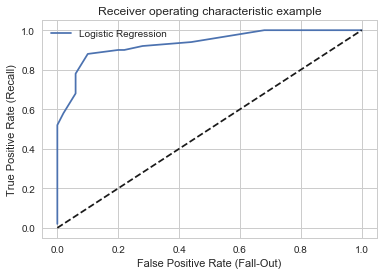

In [34]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [95]:
auc(fpr1, tpr1)

0.53279999999999994